# Introduction 

Linear Regression is a very powerful statistical technique which attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is an explanatory variable, and the other is considered to be a dependent variable. There are various applications of linear regressions which includes:

* Generation of insights on consumer behavior
* Understanding business and factors influencing profitability
* Weather forecasting
* Market forecasting, etc.

In this lab-1, we planned to create a linear regression model to predict the final mark based on the midterm mark of the students. We implemented Gradient Descent algorithm for solving a univariate linear regression problem. Gradient descent is an optimization algorithm used to minimize cost function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.If an error (cost function) is minimized, the model could provide best prediction to the the input data.



In [1]:
# Lab 1 done by Raj Kumar Ranabhat
# Import Modules and libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
marks_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
data = pd.read_csv(marks_url, error_bad_lines=False) # Read a comma-separated values (csv) file into DataFrame.
print(data) # visualization of Midterm marks and Final marks
data = np.array(data) #convert to numpy array for manipulation

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


Text(0, 0.5, 'Final marks')

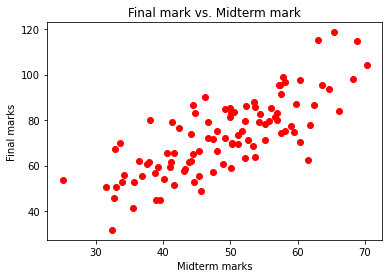

In [3]:
plt.scatter(data[:,0], data[:,1],color='red')  # scatter plot final and midterm marks
plt.title('Final mark vs. Midterm mark')
plt.xlabel('Midterm marks')
plt.ylabel('Final marks')

In [4]:
midterm = data[:,0]   # Splitted data frame to midterm and final marks array for further calculation of mean and Standard deviation
final = data[:,1]

In [5]:
# Calculate the mean and standard deviation of both marks using numpy library 
midterm_mean = np.mean(midterm)
midterm_std = np.std(midterm)

final_mean = np.mean(final)
final_std = np.std(final)

In [6]:
#calculate Z scores, which is one of the way for Standardization of the dataset
midterm_Z = (midterm - midterm_mean)/midterm_std
final_Z = (final - final_mean)/final_std


In [7]:
# Visualization of Z-Scores using pandas dataframe 
df = pd.DataFrame({'Z Score of Midterm mark': midterm_Z, 'Z Score of Final mark': final_Z})
print(df)

    Z Score of Midterm mark  Z Score of Final mark
0                 -1.697217              -2.475754
1                  0.457946              -0.237409
2                  1.293201              -0.611472
3                 -0.150449              -0.074511
4                  1.117901               0.872713
..                      ...                    ...
95                 0.107346               0.528816
96                 0.024851              -0.038311
97                 0.107346               0.752048
98                -0.088578              -0.394274
99                -2.460289              -1.160500

[100 rows x 2 columns]


In [8]:
def model(x, y, m_slope, b_intercept, alpha, case) :  #  Define model function with parameters m_slope and b_intercept, training rate alpha, training data x and y and Case. 
  m_old = m_slope                                      # Case = Standardized or Non-Standardized 
  b_old = b_intercept
  
  y_reg = m_old*x + b_old

  # Initial regression line plot based on the dataset and initialized m_slope,b_intercept and step size(alpha)
  plt.scatter(x, y, label=case + ' Data', color='red')
  plt.plot(x, y_reg, color='green', label='Linear Regression Model')
  plt.title(str(case) + " Midterm mark vs. " + str(case) +" Final mark with Initial Regression before training")
  plt.xlabel(str(case)+' Midterm mark')
  plt.ylabel(str(case)+' Final mark')
  plt.legend()
  plt.show()

  # calculate error and update the weights of slope and intercept
  error_update=[]
  fig_count = 1
  N=len(y)
  for i in range(2000):
    # calculate an error i.e cost function 
    error = np.sum(np.power((y - y_reg), 2))/N
    error_update.append(error)

    # calculate the partial derivatives using gradient decent algorithm ,so as to minimize the cost function.
    grad_decent_m = (2/N*np.sum(-x*(y - y_reg)))
    grad_decent_b = (2/N*np.sum(-(y - y_reg)))

    # update weights for both slope and intercept
    m_new = m_old - alpha* grad_decent_m
    b_new = b_old - alpha*grad_decent_b
    y_reg = m_new*x + b_new # New updated regression line based on the updated slope and intercept
    m_old = m_new
    b_old = b_new


    # Put a break point in 100 Epochs and 2000, so as to plot the regression line and error till corresponding epochs. 
    if i ==  99 or i == 1999:
        plt.figure(fig_count)
        plt.subplots_adjust(bottom=2, top=4)
        plt.subplot(2,1,1)
        plt.scatter(x, y, label= str(case)+ ' Data',color='red')
        plt.plot(x, y_reg, color='blue', label='Linear Regression Model ('+str(i+1) + ' Epochs)')
        plt.xlabel(str(case) + ' Midterm mark')
        plt.ylabel(str(case) + ' Final mark')
        plt.legend()
        plt.title(str(case) + ' Midterm Mark vs. ' + str(case) + ' Final Mark through ' + str(i+1) + ' Epochs')

        plt.subplot(2,1,2)
        plt.plot(range(len(error_update)), error_update)
        plt.title('Error through ' + str(i+1) + ' Epochs,' ' Error ={:.3f}, m = {:.3f}, b = {:.3e}'.format(error,m_old, b_old))   
        plt.xlabel('Epochs')
        plt.ylabel('Error (' + 'Learning Rate (Step-Size) = ' + str(alpha)+')')
        fig_count = fig_count + 1     
   
  

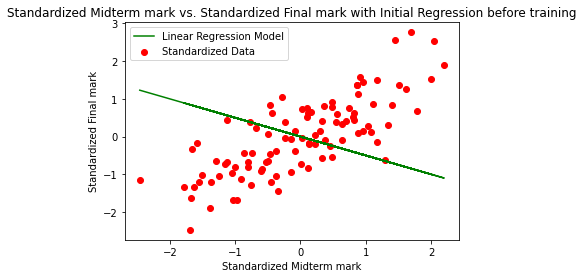

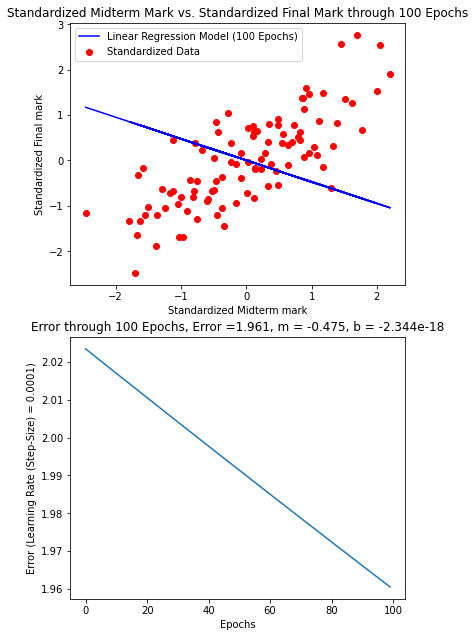

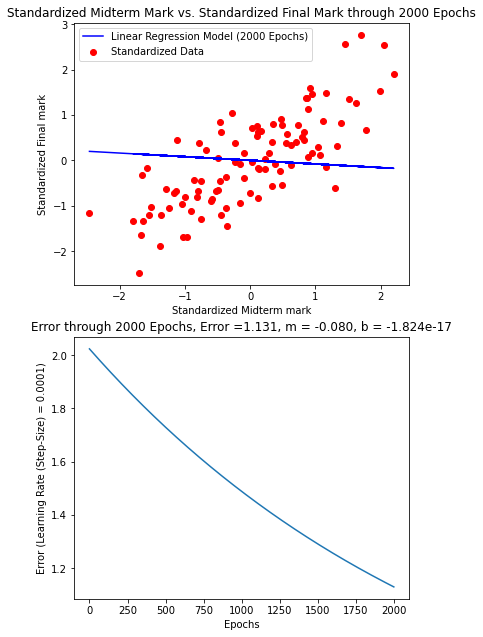

In [25]:
model(midterm_Z, final_Z, -0.5, 0, 0.0001, 'Standardized')  # Train Model with Standardized Data and Learning Rate of 0.0001

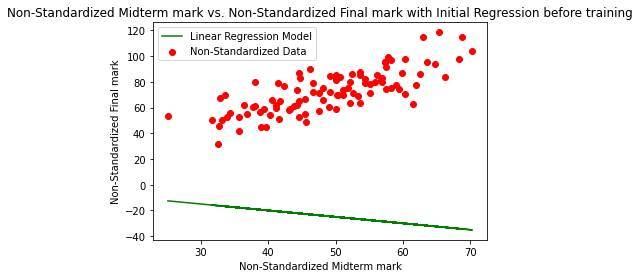

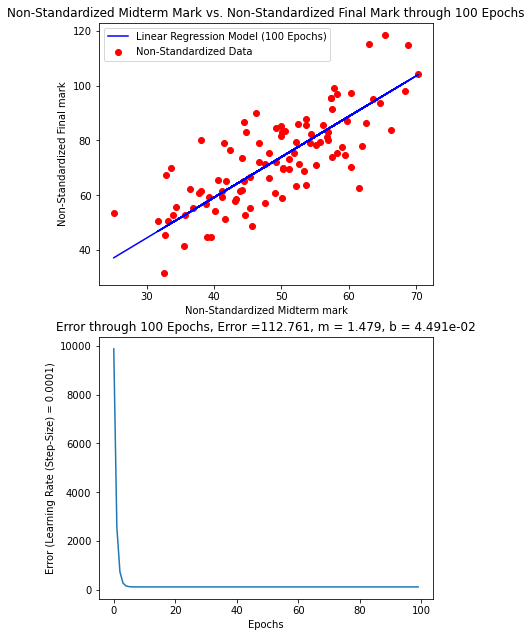

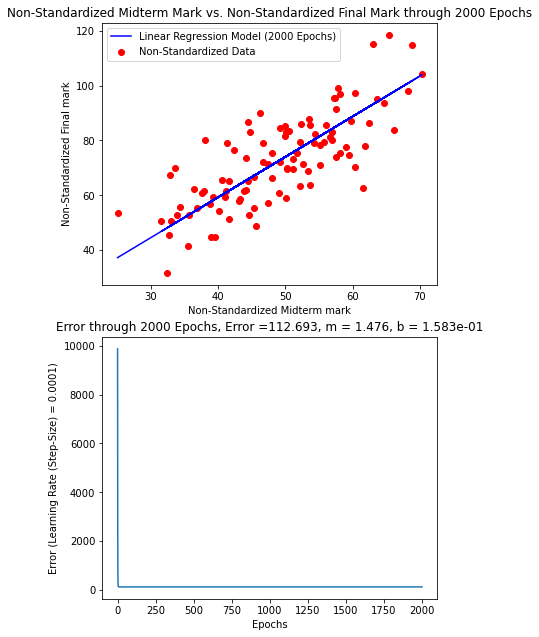

In [10]:
model(midterm, final, -0.5, 0, 0.0001, 'Non-Standardized') # Train Model with Non-Standardized Data and Learning Rate of 0.0001

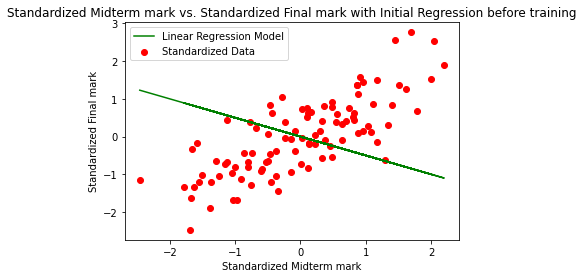

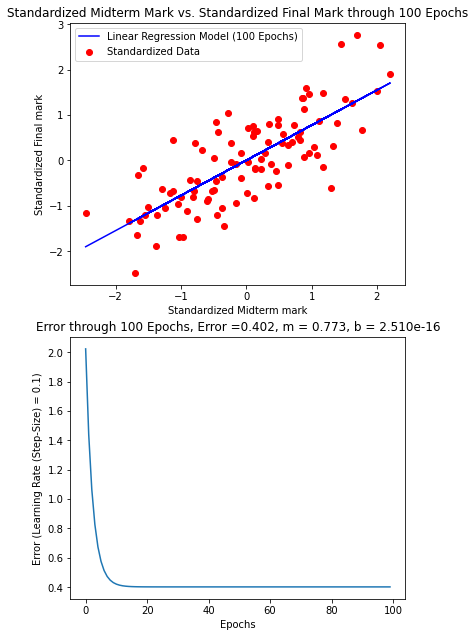

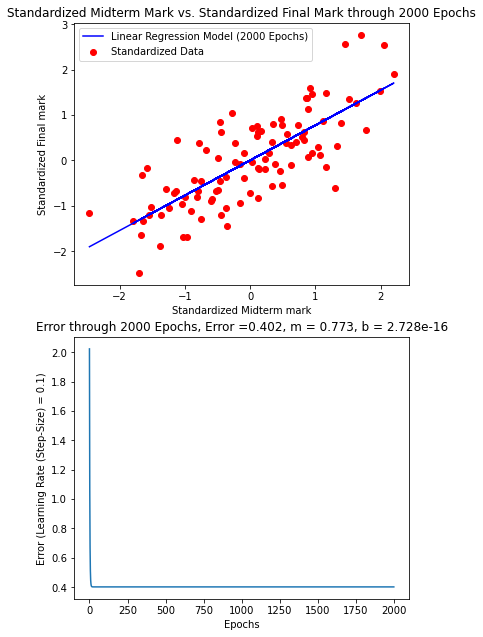

In [11]:
model(midterm_Z, final_Z, -0.5, 0, 0.1, 'Standardized')  # Train Model with Standardized Data and Learning Rate of 0.1

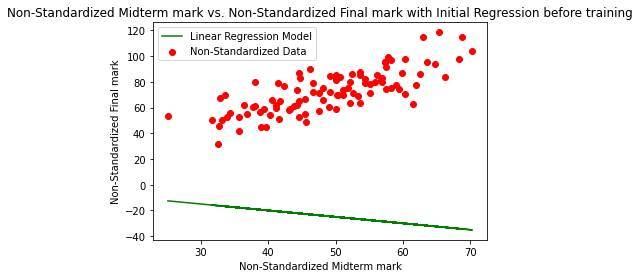

<ipython-input-8-df707b32dc24>:22: RuntimeWarning: overflow encountered in power
  error = np.sum(np.power((y - y_reg), 2))/N
<ipython-input-8-df707b32dc24>:22: RuntimeWarning: overflow encountered in power
  error = np.sum(np.power((y - y_reg), 2))/N
<ipython-input-8-df707b32dc24>:26: RuntimeWarning: overflow encountered in multiply
  grad_decent_m = (2/N*np.sum(-x*(y - y_reg)))
C:\Users\teckone\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-df707b32dc24>:30: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old - alpha* grad_decent_m
<ipython-input-8-df707b32dc24>:31: RuntimeWarning: invalid value encountered in double_scalars
  b_new = b_old - alpha*grad_decent_b


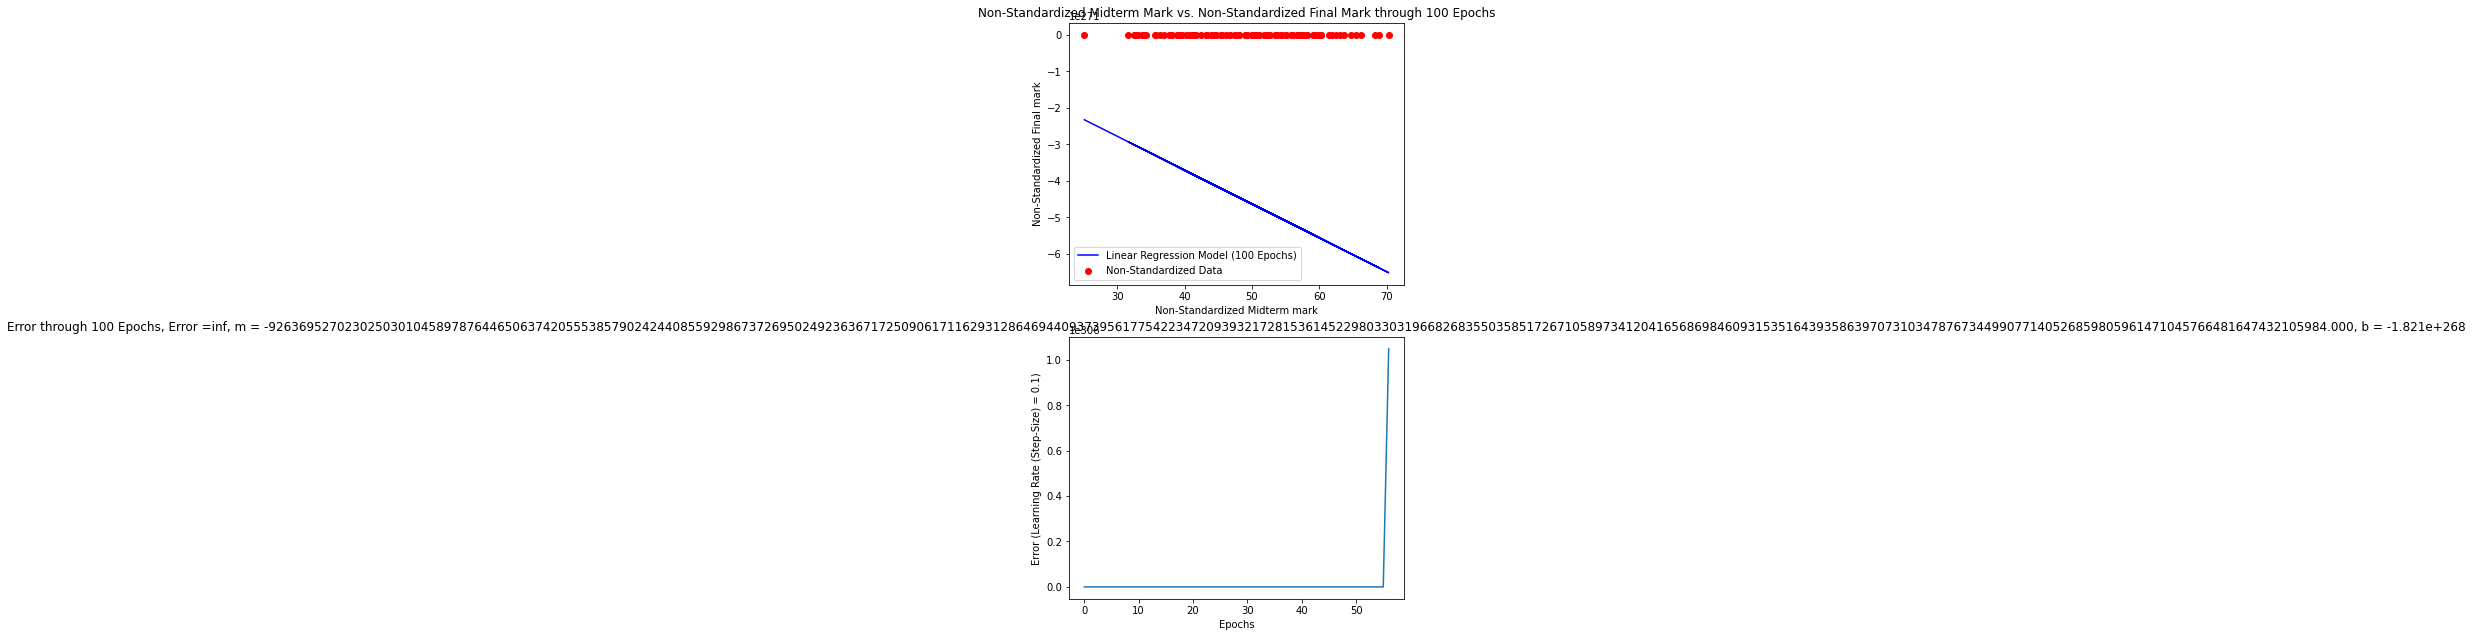

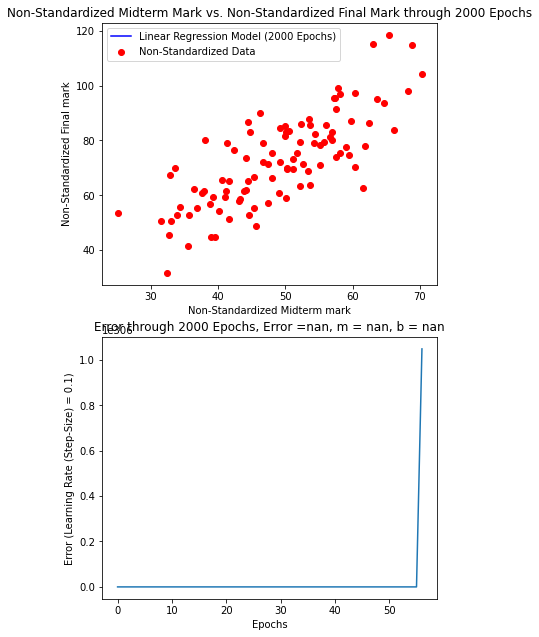

In [12]:
model(midterm, final, -0.5, 0, 0.1, 'Non-Standardized') # Train Model with Non-Standardized Data and Learning Rate of 0.1

In [13]:
def model_sklearn(x, y, case):   # cross checking previous result based on the sklearn model regression
  x = x.reshape(-1,1)
  y = y.reshape(-1,1)   
  reg = linear_model.LinearRegression() 
  x_pred = np.linspace(min(x), max(x)).reshape(-1,1)
  reg.fit(x, y)   # default learning rate of training for sklearn is 0.0001
  y_reg = reg.predict(x_pred)

  print(reg.score(x, y))
  print(reg.coef_, reg.intercept_)

  plt.scatter(x,y, color='red', label=str(case)+' Data')
  plt.plot(x_pred, y_reg, color='blue', label='sklearn Regression')
  plt.legend()
  plt.xlabel(str(case)+' Midterm Mark')
  plt.ylabel(str(case)+' Final Mark')
  plt.title(str(case)+' Midterm Mark vs. '+str(case)+' Final Mark with sklearn Regression')

0.5982684385776686
[[0.77347814]] [2.55154319e-16]


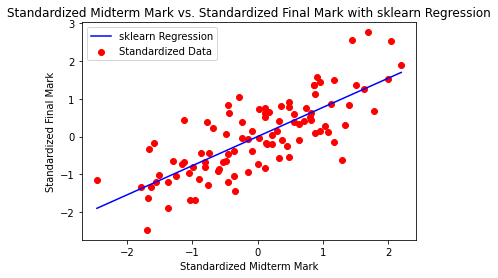

In [14]:
model_sklearn(midterm_Z, final_Z, 'Standardized')

0.5982684385776686
[[1.32199232]] [8.01157814]


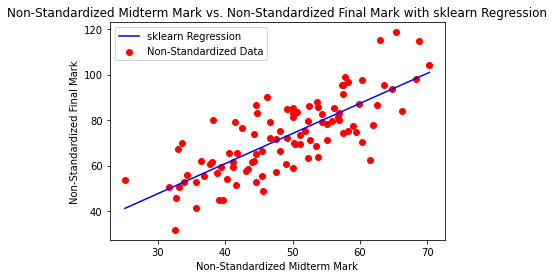

In [15]:
model_sklearn(midterm, final,'Non-Standardized')

# Results and Discussion

In this lab, we did several experiments based on step size/learning rate (alpha= 0.0001 and 0.1), Standardization, non-Standardization with initial slope(m)= -0.5 and intercept(b)= 0. The results are shown in above figures. In addition, the plots are shown with 1 to 100 Epochs and 100 to 2000 Epochs with values of error, slope(m), and intercept(b).

Let's start to discuss with the result of Standardization and non-Standardization. Actually, there wasn't significant difference between the linear regression line model if the data has been Standardized or not. However, for the large data sets specially image datasets it helps to converge the gradient descent faster by reducing the dynamic range of variable. That means, normalization helps to converge model faster during training. We can see error is reducing linearly over the range of the epochs when the dataset is Standardization, but for non-Standardization there is sharp cutoff in the graph, this is beacuse of dynamic range of error values from 10000 to 0. 

Regarding the step size, when the step size was changed from alpha =0.0001 to alpha=0.1. Though, the step size is larger as compared to alpha = 0.0001, we can see that when the data has been Standardized, the model converged easily and faster and gave error, slope and intercept similar to when alpha = 0.0001.

But, when the data was not normalized, the model couldn't converge due to dynamic range of data and larger step size. The model was overshooted and keep oscillating between two sides of he valley with pushing gradient to infinity thereby killing entire training process. We can see from the graph results the updates of parameters went to infinite. Therefore it is always suggested to start step size/learning rate as small as 1e-6.

Finally, we compared our results by training model using sklearn library. The default alpha value of sklearn is 0.0001 and Epochs is 15,000. For Normalized datasets, the updated parameters are m= 0.7734 and b = 2.5515e-16. The algorithm is optimized to train until the cost function is v small or tends to zero. while, our implemented algorithm shows the regression line almost similar but updated parameters as m= -0.080 and b= -1.824e-17, because we trained our model only for 2000 iterations. And we can see that the error is still decreasing linearly. If we increase the training iterations(epochs) to say from 2000 to 15,000 we could get the updates of parameters almost as same as from sklearn regression.





#  Conclusion

To sum up, in this lab we tired to build a simple linear regression line based on Gradient Descent algorithm to predict final mark from the midterm mark. The model was trained based on different scenarios like Standardization and non-Standardization, alpha= 0.0001 and alpha = 0.1 until 2000 Epochs. Each Scenario reproduced results were compared and discussed in addition with the result of trained model from sklearn library. From overall results, we can say Gradient Descent algortihm approach is very useful and powerful optimizer to solve the linear regression.
